<a href="https://colab.research.google.com/github/Rizukaf-id/twitter-sentiment-analyst/blob/main/identity_theft_etkom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tweepy
from textblob import TextBlob
import pandas as pd
import re

In [ ]:
api_key = 'aN5MZ4goxDdsFZtMmKmY3kbo2'
api_key_secret = 'rrU9WNtfxubveSpGJI4ixXqq2mHtUQyedLjdl9OwGo26qDn2DY'
bearer_token = 'AAAAAAAAAAAAAAAAAAAAADQQlQEAAAAA4f2lB%2B6EC0R0cTwh8YGHwfdItjg%3DcS7MXfh0AAQmTRARHzRlCMkwiP2HYYnuvuXlmKBnp1z7Ei19EA'
access_token = '1249172344653791232-0S3YUT3hLAp6s2IoZan4LsBBzWzli9'
access_token_secret = 'tl0Iq6V89jXTIVzsQ8VS5jIAMMeQdUGbxFA8ByVBT3sX7'
client_id = 'dExwV2lvTUUzZlUxUGJzWVBjX3o6MTpjaQ'
client_secret = 'fQ-aDwh-IqlIg8gQRdDcOqG4PEX8nD5hv6mQGnzjfUvxBMdHb9'

In [ ]:
autentication = tweepy.OAuthHandler(api_key, api_key_secret)
autentication.set_access_token(access_token, access_token_secret)
api = tweepy.API(autentication, wait_on_rate_limit=True)

In [ ]:
hasil = []
maxCrawl = 1000
key_word = "identity theft"

In [ ]:
while len(hasil) < maxCrawl:
  cari = api.search_tweets(q=key_word, count=100)
  #cari = api.search(q=key_word, count=100)
  for tweet in cari:
    if len(hasil) == maxCrawl:
      break;

    tweet_clean = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet.text).split())
    tweet_properties = {
        "time stamp": tweet.created_at,
        "user": tweet.user.screen_name,
        "tweet": tweet_clean
    }


    translate_tweet = tweet_clean.translate("en")
    analysis = TextBlob(translate_tweet)

    if analysis.sentiment.polarity > 0.0:
      tweet_properties["sentimen"] = "positif"
    elif analysis.sentiment.polarity == 0.0:
      tweet_properties["sentimen"] = "netral"
    else:
      tweet_properties["sentimen"] = "negatif"

    if tweet.retweet_count > 0:
      if tweet_properties not in hasil:
        hasil.append(tweet_properties)
    else:
      hasil.append(tweet_properties)

Forbidden: ignored

In [ ]:
hasil

[{'time stamp': datetime.datetime(2023, 5, 28, 13, 51, 51, tzinfo=datetime.timezone.utc),
  'user': 'PLANETROCK2014',
  'tweet': 'RT Colorado SSN Identity Theft Identity Theft',
  'sentimen': 'netral'},
 {'time stamp': datetime.datetime(2023, 5, 28, 13, 51, 20, tzinfo=datetime.timezone.utc),
  'user': 'yhk38',
  'tweet': 'RT Colorado SSN Identity Theft Identity Theft',
  'sentimen': 'netral'},
 {'time stamp': datetime.datetime(2023, 5, 28, 13, 50, 17, tzinfo=datetime.timezone.utc),
  'user': 'mlpdisneylover',
  'tweet': 'RT My last two brain cells being investigated for identity theft',
  'sentimen': 'netral'},
 {'time stamp': datetime.datetime(2023, 5, 28, 13, 50, 12, tzinfo=datetime.timezone.utc),
  'user': 'JAZAsZ5MaUvZNbl',
  'tweet': 'RT Colorado SSN Identity Theft Identity Theft',
  'sentimen': 'netral'},
 {'time stamp': datetime.datetime(2023, 5, 28, 13, 49, 51, tzinfo=datetime.timezone.utc),
  'user': 'Nanjyou_Ibuki',
  'tweet': 'RT Colorado SSN Identity Theft Identity Theft',


In [ ]:
tweet_positif = [t for t in hasil if t["sentimen"] == "positif"]
tweet_netral = [t for t in hasil if t["sentimen"] == "netral"]
tweet_negatif = [t for t in hasil if t["sentimen"] == "negatif"]

print("hasil sentimen")
print("positif: ", len(tweet_positif), "({}%)".format(100*len(tweet_positif)/len(hasil)))
print("netral: ", len(tweet_netral), "({}%)".format(100*len(tweet_netral)/len(hasil)))
print("negatif: ", len(tweet_negatif), "({}%)".format(100*len(tweet_negatif)/len(hasil)))
print(len(hasil))

hasil sentimen
positif:  242 (24.2%)
netral:  418 (41.8%)
negatif:  340 (34.0%)
1000


In [ ]:
df = pd.DataFrame(hasil)
df

,time stamp,user,tweet,sentimen
0,2023-05-28 13:51:51+00:00,PLANETROCK2014,RT Colorado SSN Identity Theft Identity Theft,netral
1,2023-05-28 13:51:20+00:00,yhk38,RT Colorado SSN Identity Theft Identity Theft,netral
2,2023-05-28 13:50:17+00:00,mlpdisneylover,RT My last two brain cells being investigated ...,netral
3,2023-05-28 13:50:12+00:00,JAZAsZ5MaUvZNbl,RT Colorado SSN Identity Theft Identity Theft,netral
4,2023-05-28 13:49:51+00:00,Nanjyou_Ibuki,RT Colorado SSN Identity Theft Identity Theft,netral
...,...,...,...,...
995,2023-05-28 13:11:55+00:00,hugujo,identity theft,netral
996,2023-05-28 13:48:08+00:00,BKA_LaNique,The thing about blessing people it must be God...,negatif
997,2023-05-28 13:43:55+00:00,Bryan_Conquer22,You now have control over your personal data e...,netral
998,2023-05-28 13:42:59+00:00,MichaelDHoward,Is law agent direct accessory to prosecuting f...,positif


In [ ]:
df['sentimen'] = df['sentimen'].replace([0])

In [ ]:
df.groupby('sentimen').describe()

<ipython-input-10-5f6050d90dc8>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.groupby('sentimen').describe()
<ipython-input-10-5f6050d90dc8>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.groupby('sentimen').describe()
<ipython-input-10-5f6050d90dc8>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.groupby('sentimen').describe()


time stamp                                         \
              count unique                        top freq   
sentimen                                                     
negatif         340      3  2023-05-28 13:48:08+00:00  114   
netral          418     80  2023-05-28 13:43:55+00:00  114   
positif         242     16  2023-05-28 13:42:59+00:00  114   

                                                                user         \
                              first                       last count unique   
sentimen                                                                      
negatif   2023-05-28 13:19:17+00:00  2023-05-28 13:48:08+00:00   340      3   
netral    2023-05-28 13:09:20+00:00  2023-05-28 13:51:51+00:00   418     81   
positif   2023-05-28 13:27:26+00:00  2023-05-28 13:47:43+00:00   242     16   

                                          tweet         \
                      top freq first last count unique   
sentimen                                                 
negatif       BKA_LaNique  114   NaN  NaN   340      3   
netral    Bryan_Conquer22  114   NaN  NaN   418      6   
positif    MichaelDHoward  114   NaN  NaN   242      3   

                                                                             
                                                        top freq first last  
sentimen                                                                     
negatif   The thing about blessing people it must be God...  114   NaN  NaN  
netral    You now have control over your personal data e...  114   NaN  NaN  
positif   Is law agent direct accessory to prosecuting f...  114   NaN  NaN

<function matplotlib.pyplot.show(close=None, block=None)>

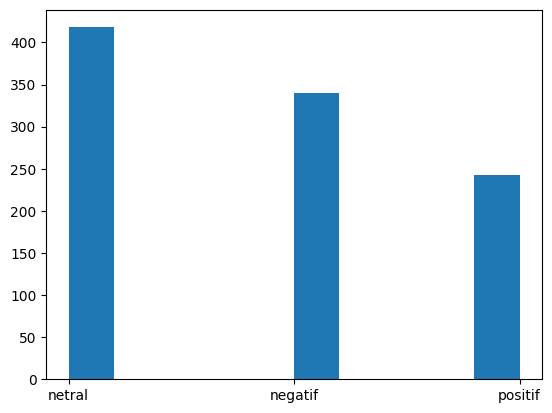

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['sentimen'])
plt.show

In [ ]:
df.to_csv('identity_theft.csv', index=False, header=True)